In [5]:
import os
import sys
import numpy as np
import pandas as pd
from typing import List, Dict
from PIL import Image
import io
import base64
import logging
from IPython.display import Image, display,HTML

logging.basicConfig(format='%(levelname)s: %(message)s', level=logging.INFO)

In [6]:
sys.path.append("..")

In [7]:
from src.steps.core.datasets import Dataset
from src.steps.core.visualize import array_to_image
from src.steps.augumentation.augmentors import *

In [8]:
dataset = Dataset("ironcar-friend-shared", "..\\data\\datasets\\ironcar-friend-shared")
dataset.load()

INFO: ..\data\datasets\ironcar-friend-shared\X.npy loaded
INFO: ..\data\datasets\ironcar-friend-shared\Y.npy loaded
INFO: ..\data\datasets\ironcar-friend-shared\C.npy loaded
INFO: Corrected Y matrix created (Ym), 608 records have been patched


## Augmentation

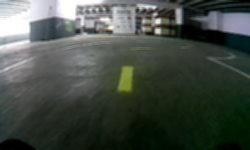

In [295]:
display(array_to_image(cv2.blur(dataset.X[40],(3,3))))

In [245]:
def compute_gamma(image):
    avg_channel = np.mean(image[:,:,0:2], axis=2)
    return np.median(avg_channel)

compute_gamma(dataset.X[79])

22.5

In [9]:
type(dataset.X[79])

numpy.ndarray

In [246]:
#gamma = 0.6
gamma_max = 200
def gammaCorrection(image, gamma):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv2.LUT(image, lookUpTable)
    img_gamma_corrected = cv2.hconcat([image, res])
    return img_gamma_corrected

In [273]:
TARGET_GAMMA = 1.8

def auto_gamma_correction(image):
    x = 0.2 / 40
    b = 0.5375
    g = compute_gamma(image)
    compensation_gamma = x * g * TARGET_GAMMA + b
    return gammaCorrection(image, compensation_gamma)

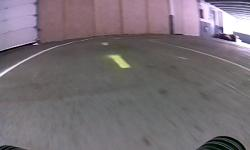

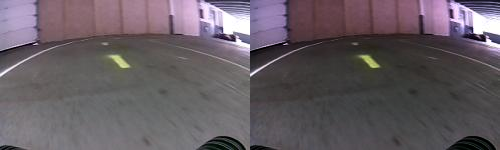

In [284]:
image = dataset.X[546]
display(array_to_image(image))
image = auto_gamma_correction(image)
display(array_to_image(image))

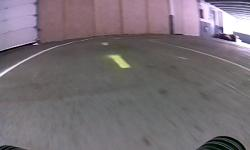

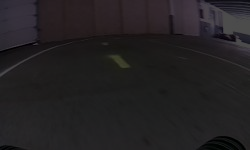

In [290]:
image = dataset.X[546]
display(array_to_image(image))

contrast = 0.3
a = image.astype(np.float64) * contrast
a = np.clip(a, 0, 255)
a = a.astype(np.uint8)
display(array_to_image(a))


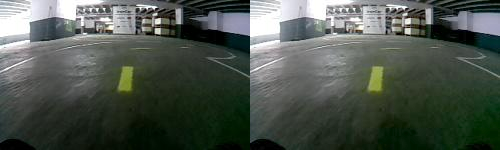

In [240]:
display(array_to_image(gammaCorrection(dataset.X[40], 0.8)))

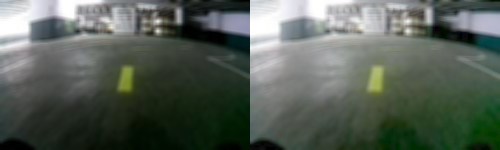

In [250]:
display(array_to_image(gammaCorrection(cv2.blur(dataset.X[40],(5,5)), 0.6)))

## Crop

In [184]:
def extract_roi(array, steer, top=None, bottom=None, left=None, right=None):
    shape=array.shape
    print(shape)
    if(bottom):
        bottom = shape[0] - bottom

    ret = array[top:(bottom),left:right,:]
        
    shape=ret.shape
    print(shape)

    return ret, steer
    

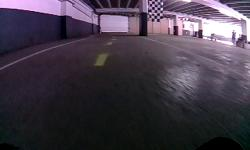

(150, 250, 3)
(106, 250, 3)


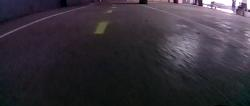

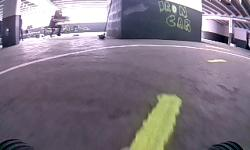

(150, 250, 3)
(106, 250, 3)


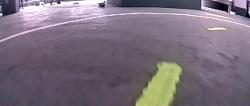

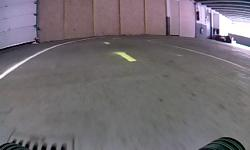

(150, 250, 3)
(106, 250, 3)


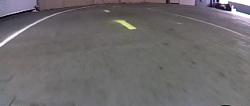

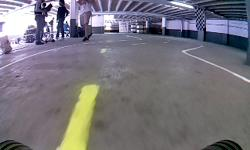

(150, 250, 3)
(106, 250, 3)


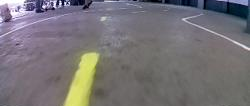

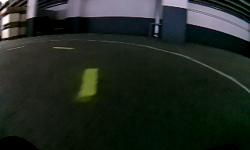

(150, 250, 3)
(106, 250, 3)


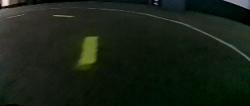

In [194]:
CAMERA_TOP_CROP = 32
CAMERA_BOTTOM_CROP = 12

for ind in random.sample(range(len(dataset.X)), 5):
    display(array_to_image(dataset.X[ind]))
    display(array_to_image(extract_roi(dataset.X[ind], [], top=CAMERA_TOP_CROP, bottom=CAMERA_BOTTOM_CROP)[0]))

In [187]:
def edge_detect_channels(array, steer):
    r = array[:,:,0]
    edgesr = cv2.Canny(r, 100, 200)
    g = array[:,:,1]
    edgesg = cv2.Canny(g, 100, 200)
    b = array[:,:,2]
    edgesb = cv2.Canny(b, 100, 200)
    
    ret = array.copy()
    ret[:,:,0]+=edgesr
    ret[:,:,1]+=edgesg
    ret[:,:,2]+=edgesb
    
    return ret, steer

def edge_detect(array, steer):
    edges = cv2.Canny(array, 100, 200)
   
    ret = array.copy()
    
    #ret[:,:,0] += edges
    #ret[:,:,1] += edges
    #ret[:,:,2] += edges
    
    #ret = ret % 256
    
    ret = edges
    
    return ret, steer

In [153]:
E = edge_detect(dataset.X[550], [])[0]

In [154]:
#E1 = np.expand_dims(E, axis=2)
#E1 = np.expand_dims(E1, axis=4)
E

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0]], dtype=uint8)

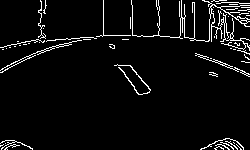

In [155]:
array_to_image(E)

In [96]:
array_to_image(dataset.X[0] + edge_detect(dataset.X[0], [])[0])

TypeError: Cannot handle this data type: (1, 1, 3), <i2

In [156]:
augmentors = [
    augment_brightness_camera_images,
    add_random_shadow,
    night_effect,
    adjust_gamma_dark,
    horizontal_flip,
    edge_detect
]

In [ ]:
AugmentationPipeline(augmentors)

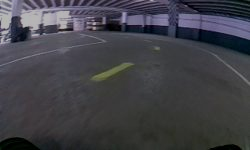

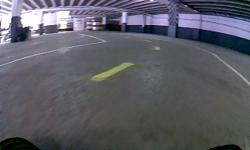

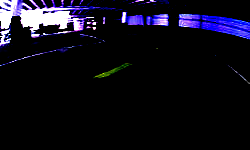

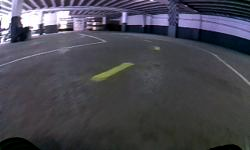

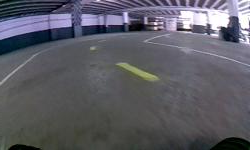

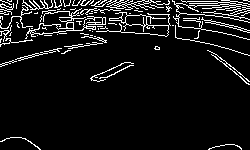

In [157]:
index = 700

for augmentor in augmentors:
    new_image, new_steer = augmentor(dataset.X[index], dataset.Ym[index])
    display(HTML("<div>%s &rarr; %s</div>" % (augmentor.__name__, new_steer))) 
    display(array_to_image(new_image))

In [1]:
horizontal_flip(dataset.X[index], 0.3)

NameError: name 'horizontal_flip' is not defined